**Assignment 8**  
Matt Caraher

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

df = pd.read_csv('breastcancer.csv')

1. Perform data exploratory analysis on the data

In [2]:
print('Exploring the dataset\n')
print('First rows of the dataset')
print(df.head())
print('\nData types')
print(df.dtypes)
print('\nUsing describe on the data')
print(df.describe())
print('\nNull values:', df.isnull().sum().sum())

Exploring the dataset

First rows of the dataset
   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  

Data types
Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

Usi

2. Use 30% of data as the test set and build a logistic regression model to predict labels variable

In [3]:
X = df.drop('Classification', axis=1)
y = df['Classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

lr = linear_model.LogisticRegression(max_iter=1000)

lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [4]:
print('Coefficient', lr.coef_)
print('\nIntercept', lr.intercept_)

Coefficient [[-0.04222102 -0.17095351  0.154092    0.03702443  0.19081326 -0.03493633
   0.03387014  0.05315573  0.00028266]]

Intercept [-8.08270251]


In [5]:
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

print('Accuracy of train:', metrics.accuracy_score(y_train, lr_train_pred))
print('Accuracy of test:', metrics.accuracy_score(y_test, lr_test_pred))

Accuracy of train: 0.8271604938271605
Accuracy of test: 0.6285714285714286


In [6]:
train_cm = metrics.confusion_matrix(y_train, lr_train_pred)
print('\nTrain confusion matrix\n', train_cm)

test_cm = metrics.confusion_matrix(y_test, lr_test_pred)
print('\nTest confusion matrix\n', test_cm)


Train confusion matrix
 [[32  5]
 [ 9 35]]

Test confusion matrix
 [[10  5]
 [ 8 12]]


Text(0.5, 0, 'Predicted label')

<Figure size 640x480 with 0 Axes>

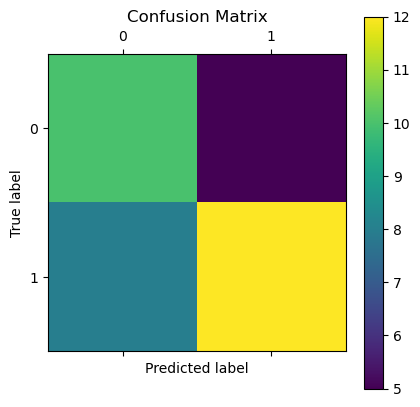

In [7]:
plt.figure()
plt.matshow(test_cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

3. Build naive bayes model to predict labels variable

In [8]:
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [9]:
NB_train_pred = NB.predict(X_train)
NB_test_pred = NB.predict(X_test)

print('Accuracy of train:', metrics.accuracy_score(y_train, NB_train_pred))
print('Accuracy of test:', metrics.accuracy_score(y_test, NB_test_pred))

Accuracy of train: 0.6666666666666666
Accuracy of test: 0.5428571428571428


In [10]:
train_cm = metrics.confusion_matrix(y_train, NB_train_pred)
print('\nTrain confusion matrix\n', train_cm)

test_cm = metrics.confusion_matrix(y_test, NB_test_pred)
print('\nTest confusion matrix\n', test_cm)


Train confusion matrix
 [[34  3]
 [24 20]]

Test confusion matrix
 [[12  3]
 [13  7]]


In [11]:
np.set_printoptions(precision=2)
NB.predict_proba(X_test[:5])

array([[1.14e-42, 1.00e+00],
       [2.77e-03, 9.97e-01],
       [9.88e-01, 1.18e-02],
       [2.34e-02, 9.77e-01],
       [9.89e-01, 1.12e-02]])

Build the decision tree model to predict labels variable

4. Build decision tree model to predict labels variable

In [12]:
DT = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 5)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5)

In [13]:
DT_pred = DT.predict(X_test)

print('Accuracy of test:', metrics.accuracy_score(DT_pred, y_test))

print('\nClassification report:\n', metrics.classification_report(y_test, DT_pred))

Accuracy of test: 0.6285714285714286

Classification report:
               precision    recall  f1-score   support

           1       0.56      0.67      0.61        15
           2       0.71      0.60      0.65        20

    accuracy                           0.63        35
   macro avg       0.63      0.63      0.63        35
weighted avg       0.64      0.63      0.63        35



In [14]:
print('Feature importances:', DT.feature_importances_)

pd.DataFrame({'variable':df.columns[:9],
             'importance':DT.feature_importances_})

Feature importances: [0.25 0.08 0.38 0.   0.05 0.05 0.   0.19 0.  ]


,variable,importance
0,Age,0.249987
1,BMI,0.084638
2,Glucose,0.378216
3,Insulin,0.000000
4,HOMA,0.051326
5,Leptin,0.046415
6,Adiponectin,0.000000
7,Resistin,0.189417
8,MCP.1,0.000000


5. Build neural network model to predict labels variable

In [15]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [16]:
X_train_scaled[:3]

array([[0.53, 0.56, 0.05, 0.01, 0.01, 0.15, 0.4 , 0.36, 0.52],
       [0.27, 0.59, 0.21, 0.03, 0.02, 0.09, 0.13, 0.64, 0.6 ],
       [0.28, 0.87, 0.15, 0.37, 0.19, 0.31, 0.17, 0.04, 0.55]])

In [17]:
X_test_scaled[:3]

array([[0.28, 0.61, 0.92, 1.  , 1.  , 0.54, 0.13, 0.29, 0.36],
       [0.18, 0.28, 0.43, 0.49, 0.35, 0.25, 0.59, 0.17, 0.26],
       [0.93, 0.85, 0.22, 0.03, 0.02, 0.36, 0.19, 0.28, 0.35]])

In [18]:
NN = MLPClassifier(solver = 'lbfgs', alpha = 1e-5,
                  hidden_layer_sizes = (10, 4), random_state = 1,
                  max_iter=1000)

NN.fit(X_train_scaled, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 4), max_iter=1000,
              random_state=1, solver='lbfgs')

In [19]:
NN_pred = NN.predict(X_test_scaled)

print('Accuracy score:', metrics.accuracy_score(NN_pred, y_test))

print('\nClassification report\n', metrics.classification_report(y_test, NN_pred))

Accuracy score: 0.6285714285714286

Classification report
               precision    recall  f1-score   support

           1       0.67      0.27      0.38        15
           2       0.62      0.90      0.73        20

    accuracy                           0.63        35
   macro avg       0.64      0.58      0.56        35
weighted avg       0.64      0.63      0.58        35



I concluded from the accuracy scores that Naive Bayes would be the least ideal since it is the only one with a lower accuracy score. Based on the precision and recall outputted by the classification reports, I concluded that the decision tree is the best model. The precision of neural network is comparable, but the recall is very low, with 0.27. Likewise, the f1 score is lower for the neural network.

Most important variable from df: this would be Glucose, since the decision tree model shows it having a 0.37 importance score.